In [4]:
from pymlutil.functions import *
from pymlutil.jsonutil import ReadDict, WriteDict
from pymlutil.version import VersionString
from pymlutil.s3 import s3store, Connect
import torch
from matplotlib import pyplot as plt

### GaussianBasis
GaussianBasis computes a unit height gaussian bell curve function
$$ GaussianBasis(x, zero, sigma) = e^{-\frac{(x-zero)^2}{2*sigma^2}} $$
- x : function input
- zero : location of the peak center
- sigma: curve with or standard deviation

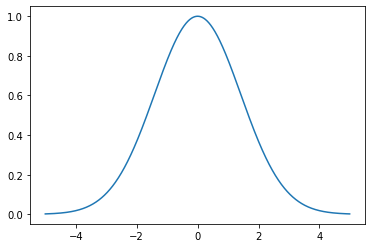

In [8]:
x = np.arange(-2.0, 2.0, 0.01) 
y = GaussianBasis(torch.tensor(x))
plt.plot(x, y)
plt.show()

## S3
The pymutil s3 module provides an interface on top of the python minio library.  Class functions include
- __init__: managing urllib3 certificate and timeout paraemeters for connection to https and http endpoints
- PutDir: write local directory to object storage
- GetDir: 

In [5]:
credentials = "creds.yaml"
s3, creds, s3def = Connect(credentials)
s3def

{'name': 'store',
 'type': 'trainer',
 'address': '198.211.145.1:30990',
 'tls': False,
 'sets': {'dataset': {'bucket': 'mllib',
   'prefix': 'data',
   'dataset_filter': ''},
  'trainingset': {'bucket': 'mllib',
   'prefix': 'training',
   'dataset_filter': ''},
  'model': {'bucket': 'mllib', 'prefix': 'model', 'dataset_filter': ''},
  'test': {'bucket': 'mllib', 'prefix': 'test', 'dataset_filter': ''}}}

In [6]:
dest = '{}/{}'.format(s3def['sets']['dataset']['prefix'], 'testimages')
s3.PutDir(s3def['sets']['dataset']['bucket'], 'dataset', dest)

0it [00:00, ?it/s]


True

pymlutil provides exposes a module command line interface to the following functions

'''cmd
python3 -m pymlutil -p -src tests/testimages -set dataset -dest testimages
'''

In [8]:
! python3 -m pymlutil -p -src tests/testimages -set dataset -dest testimages

100%|█████████████████████████████████████████████| 3/3 [00:00<00:00, 98.15it/s]
pymluitil complete
